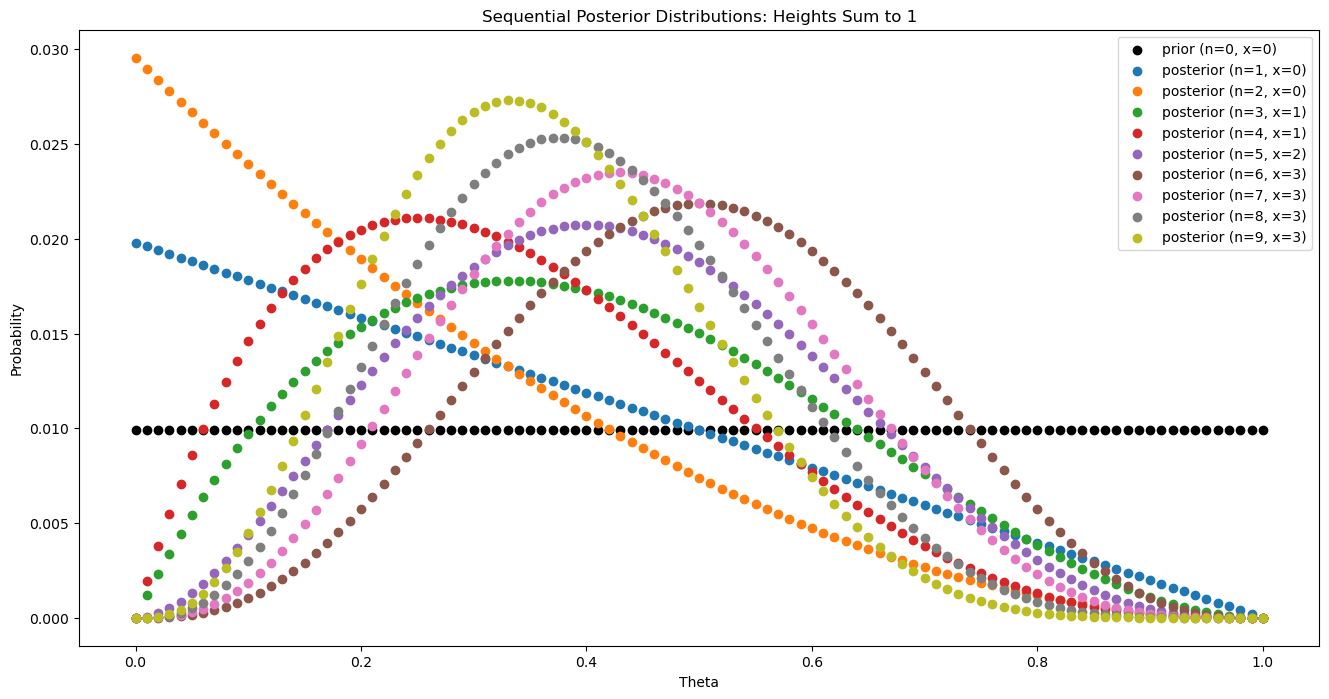

In [3]:
# question 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter space and uniform prior
parameter_domain = np.linspace(0, 1, 101)  # Discrete values of theta
prior = np.ones(101) / 101  # Uniform prior over theta

# Observations
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]
n, x = 0, 0  # Initialize counters for number of trials and successes

# Plotting setup
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label=f"prior (n={n}, x={x})", color='k')

# Sequential updates
for observation in observations:
    n += 1  # Increment total trials
    x += observation  # Increment successes
    
    # Compute the likelihood
    likelihood = parameter_domain**observation * (1 - parameter_domain)**(1 - observation)
    
    # Update posterior: posterior ‚àù likelihood * prior
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize to make it a proper distribution
    
    # Update prior for the next observation
    prior = posterior
    
    # Plot updated posterior
    plt.scatter(parameter_domain, posterior, label=f"posterior (n={n}, x={x})")

# Finalize plot
plt.title("Sequential Posterior Distributions: Heights Sum to 1")
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.legend()
plt.show()


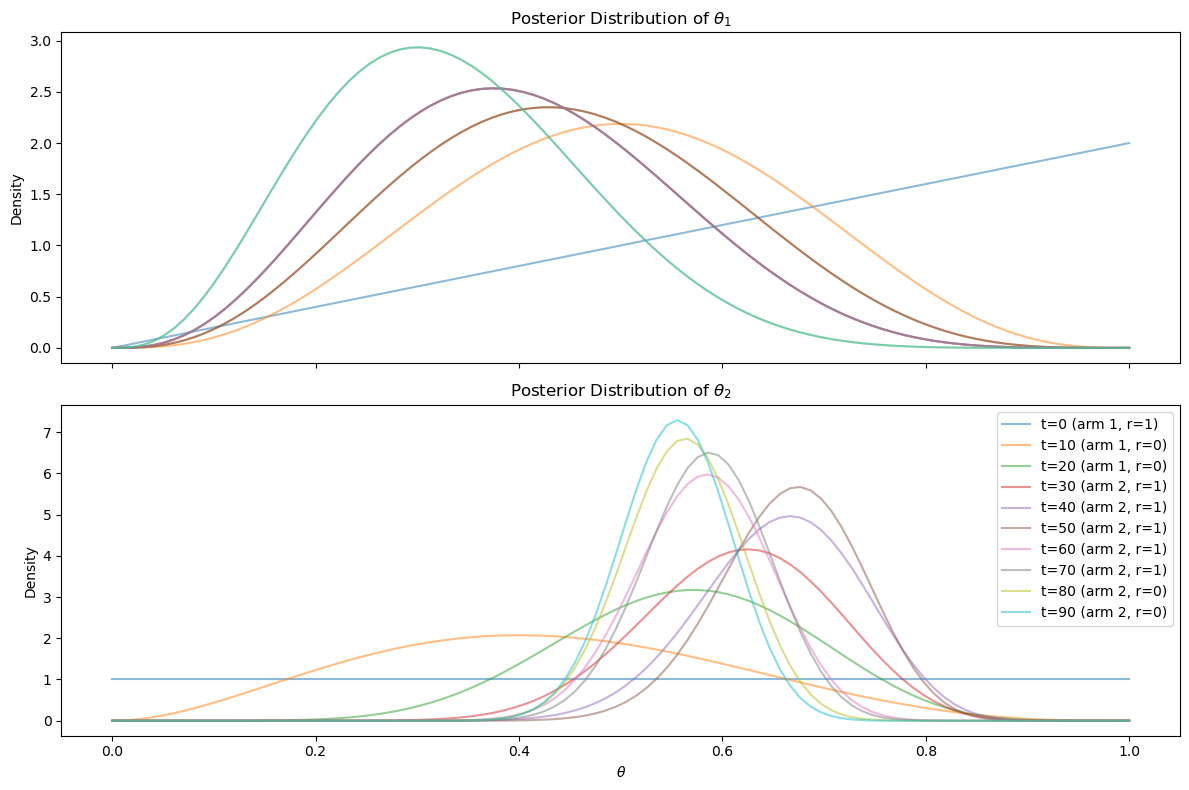

In [4]:
# question 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True probabilities for the two coins
theta1_true = 0.4  # True success rate of the first arm
theta2_true = 0.6  # True success rate of the second arm

# Parameters for Beta distributions (initial priors)
alpha1, beta1 = 1, 1  # Prior for theta1
alpha2, beta2 = 1, 1  # Prior for theta2

# Number of iterations
num_trials = 100
history = []

# Simulation of Bayesian multi-armed bandit
for t in range(num_trials):
    # Sample from the posterior distributions
    theta1_sample = np.random.beta(alpha1, beta1)
    theta2_sample = np.random.beta(alpha2, beta2)
    
    # Choose the arm with the highest sampled value (Thompson Sampling)
    if theta1_sample > theta2_sample:
        chosen_arm = 1
        reward = np.random.binomial(1, theta1_true)  # Flip coin 1
        alpha1 += reward
        beta1 += 1 - reward
    else:
        chosen_arm = 2
        reward = np.random.binomial(1, theta2_true)  # Flip coin 2
        alpha2 += reward
        beta2 += 1 - reward

    # Store history for visualization
    history.append((t, alpha1, beta1, alpha2, beta2, chosen_arm, reward))

# Visualization of learning progress
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot posterior distributions
x = np.linspace(0, 1, 100)
for t, a1, b1, a2, b2, arm, r in history[::10]:  # Plot every 10th step
    ax[0].plot(x, beta.pdf(x, a1, b1), label=f"t={t} (arm {arm}, r={r})", alpha=0.5)
    ax[1].plot(x, beta.pdf(x, a2, b2), label=f"t={t} (arm {arm}, r={r})", alpha=0.5)

ax[0].set_title("Posterior Distribution of $\\theta_1$")
ax[1].set_title("Posterior Distribution of $\\theta_2$")
ax[0].set_ylabel("Density")
ax[1].set_ylabel("Density")
ax[1].set_xlabel("$\\theta$")
plt.legend()
plt.tight_layout()
plt.show()


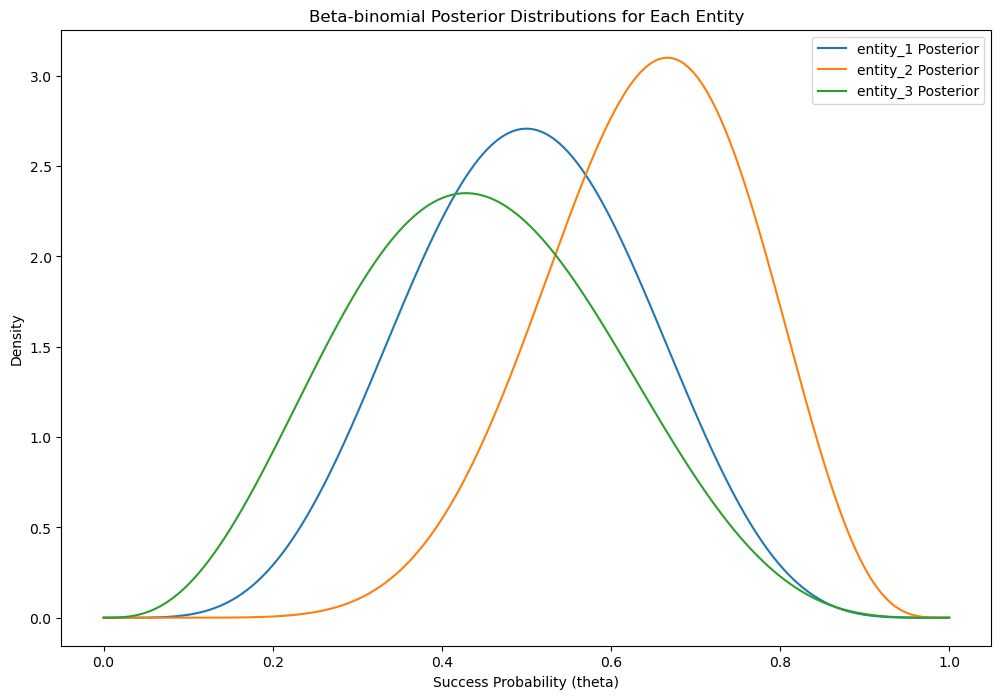

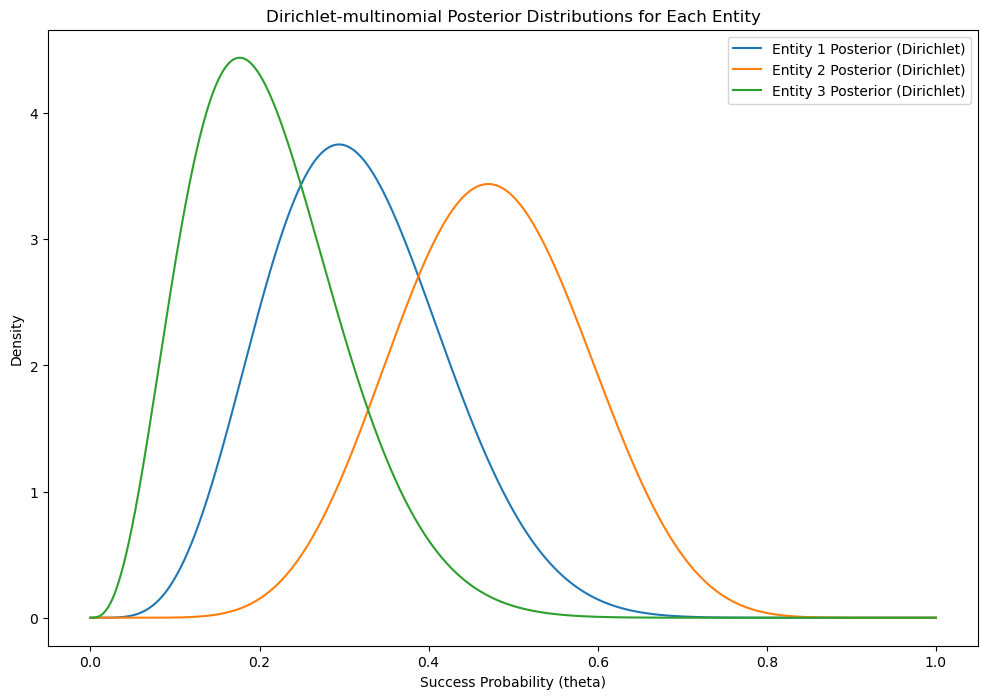

Beta-binomial Analysis Posterior Means:
entity_1: 0.50
entity_2: 0.64
entity_3: 0.44

Dirichlet-multinomial Analysis Posterior Means:
Entity 1: 0.32
Entity 2: 0.47
Entity 3: 0.21


In [18]:
# question 3 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for three entities: number of successes and trials
data = {
    "entity_1": {"successes": 5, "trials": 10},
    "entity_2": {"successes": 8, "trials": 12},
    "entity_3": {"successes": 3, "trials": 7}
}

# Hyperparameters for Beta priors (Alpha, Beta for each entity)
alpha_prior = [1, 1, 1]  # Uniform prior for simplicity
beta_prior = [1, 1, 1]   # Uniform prior for simplicity

# Analysis 1: Beta-binomial for each entity independently
def beta_binomial_posterior(successes, trials, alpha, beta):
    # Posterior of Beta given Binomial likelihood
    return stats.beta(alpha + successes, beta + trials - successes)

# Posterior distributions for each entity
posteriors = {}
for entity, values in data.items():
    alpha = alpha_prior.pop(0)
    beta = beta_prior.pop(0)
    posteriors[entity] = beta_binomial_posterior(values["successes"], values["trials"], alpha, beta)

# Plot the posterior distributions of success probabilities for each entity
plt.figure(figsize=(12, 8))
x = np.linspace(0, 1, 1000)
for entity, posterior in posteriors.items():
    plt.plot(x, posterior.pdf(x), label=f"{entity} Posterior")
plt.title("Beta-binomial Posterior Distributions for Each Entity")
plt.xlabel("Success Probability (theta)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Analysis 2: Dirichlet-multinomial for all entities together

# Combine the data
successes = np.array([data["entity_1"]["successes"], data["entity_2"]["successes"], data["entity_3"]["successes"]])
trials = np.array([data["entity_1"]["trials"], data["entity_2"]["trials"], data["entity_3"]["trials"]])
n = successes + trials

# Hyperparameters for Dirichlet prior
alpha_dirichlet = np.array([1, 1, 1])  # Uniform prior for the Dirichlet distribution

# Dirichlet prior: Calculate posterior as a simple conjugate Dirichlet update
# The posterior for Dirichlet given multinomial is the update of the concentration parameters
posterior_dirichlet = alpha_dirichlet + successes

# Plot the posterior distributions for the success probabilities (Dirichlet)
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(12, 8))
for i in range(3):
    # Simulate the posterior distribution for each entity using the updated Dirichlet parameters
    pdf = stats.beta(posterior_dirichlet[i], sum(posterior_dirichlet) - posterior_dirichlet[i])
    plt.plot(x, pdf.pdf(x), label=f"Entity {i+1} Posterior (Dirichlet)")

plt.title("Dirichlet-multinomial Posterior Distributions for Each Entity")
plt.xlabel("Success Probability (theta)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Summarize the results
print("Beta-binomial Analysis Posterior Means:")
for entity, posterior in posteriors.items():
    print(f"{entity}: {posterior.mean():.2f}")

print("\nDirichlet-multinomial Analysis Posterior Means:")
# Calculate means for Dirichlet posterior distributions
for i, entity in enumerate(data.keys()):
    posterior_mean_dirichlet = posterior_dirichlet[i] / sum(posterior_dirichlet)
    print(f"Entity {i+1}: {posterior_mean_dirichlet:.2f}")




## Conclusion

Based on the analysis of the two models, here's a summary of when each approach is most appropriate and how they can be applied in a real-world AB testing context:

### Beta-binomial Model
- **Appropriate for independent entities** where each entity's success probability is treated separately.
- Best used when the entities do not share common characteristics or relationships.
- **Use case**: Testing completely independent versions of a product page in different regions or markets.

### Dirichlet-multinomial Model
- **Appropriate for related entities** where the success probabilities may share some underlying structure or dependencies.
- Best used when entities are expected to have related success rates or share common factors (such as similar user demographics).
- **Use case**: Testing similar product page designs across different user groups or regions, where the designs may influence each other.

### Choosing the Right Model for AB Testing
- **If the entities are independent**, the Beta-binomial model provides a simpler and more effective way to balance exploration and exploitation in a Bayesian multi-armed bandit setting.
- **If the entities share relationships**, the Dirichlet-multinomial model will pool information across the arms, leading to more efficient exploration and better overall performance in the multi-armed bandit context.
